# Data overview
XYZ coordinates given for detected VICON markers on five different hand postures. Notice that instances may have a varying number of data points. Detailed description of dataset can be found here http://www2.latech.edu/~jkanno/datadescription-1.pdf.

In [1]:
import numpy as np
import pandas as pd

pd.read_csv('data/train_raw.csv').describe()

,Unnamed: 0,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
count,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,...,5733.000000,4537.000000,4537.000000,4537.000000,2482.000000,2482.000000,2482.000000,0.0,0.0,0.0
mean,27296.628370,3.025481,5.777778,52.698144,85.770524,-31.826014,52.351641,86.272265,-31.711906,52.112129,...,-28.776171,57.177513,83.183279,-28.576656,53.669544,77.761579,-29.641994,NaN,NaN,NaN
std,15051.282199,1.445896,3.823397,32.676394,40.715829,33.898217,32.353705,40.641751,34.163914,33.570688,...,35.921888,41.614585,43.932179,37.058562,40.719084,46.033896,42.029159,NaN,NaN,NaN
min,5.000000,1.000000,0.000000,-80.928512,-98.233756,-120.096446,-111.685241,-96.142589,-114.271334,-106.886524,...,-114.500502,-83.649652,-39.539982,-112.908778,-80.196289,-2.877761,-103.718071,NaN,NaN,NaN
25%,14897.500000,2.000000,2.000000,31.260337,60.571185,-58.246757,30.917769,62.849522,-59.477546,29.413095,...,-59.907133,27.634371,44.872205,-58.906215,14.298679,37.354595,-70.016161,NaN,NaN,NaN
50%,25943.000000,3.000000,6.000000,55.336918,87.314804,-31.697639,55.415571,88.220022,-31.292537,56.038056,...,-27.741830,63.516259,87.992227,-27.794790,62.781569,84.955399,-31.392546,NaN,NaN,NaN
75%,38387.500000,4.000000,9.000000,75.288905,106.228314,-5.744637,75.038670,109.185672,-4.650574,75.422747,...,0.410206,86.090881,126.478059,1.340623,84.088250,121.913529,6.843351,NaN,NaN,NaN
max,56980.000000,5.000000,11.000000,151.586035,168.717458,113.345119,151.271413,170.209350,104.618115,149.208278,...,119.213101,174.054403,167.196644,122.569627,149.486224,168.352478,108.211488,NaN,NaN,NaN


A separate test set was pre-designated for this classification problem. It contains users 12, 13, and 14. This set was broken off on a user basis because individuals may form postures slightly differently than each other. The test set, therefore, tests the model's ability to classify the posture of a _new_ user.

# Feature engineering and down-selection
## Create new features
Transform XYZ coordinates into features that are more indicative of a 3D shape. This includes taking the distance from each point to the origin, determining the volume and centroid of the convex hull formed by points in an instance, calculating relative angles between points, and calculating the area of triangles formed by each combination of 3 points in a posture instance. Features with multiple calculations per instance are reduced to the max, min, mean, and std for that type of feature; this makes it so that we have the same number of true features despite posture instances having a varying number of XYZ coordinates.

The GeometricFeatures class is built to incorporate as a step in a pipeline starting at raw data, but feature creation time is a bit too long for this to be practical on a dataset of this size.

In [2]:
from os import path
from postures import GeometricFeatures

# Smaller training set
if not path.exists('data/train.csv'):
    df = pd.read_csv('data/train_raw.csv')
    GeometricFeatures().fit_transform(df).to_csv('data/train.csv', index = False)

In [3]:
# Large training set
if not path.exists('data/train_large.csv'):
    df = pd.read_csv('data/train_large_raw.csv')
    GeometricFeatures().fit_transform(df).to_csv('data/train_large.csv', index = False)

In [4]:
# Test set
if not path.exists('data/test.csv'):
    df = pd.read_csv('data/test_raw.csv')
    GeometricFeatures().fit_transform(df).to_csv('data/test.csv', index = False)

View processed data for geometrically-derived features

In [5]:
df = pd.read_csv('data/train.csv')
df.describe()

,id,class,user,n_markers,x_mean,x_std,x_min,x_max,y_mean,y_std,...,ang_min,ang_max,area_mean,area_std,area_min,area_max,conv_hull_vol,conv_hull_cx,conv_hull_cy,conv_hull_cz
count,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,...,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,1.350000e+04,13500.000000,13500.000000,13500.000000
mean,27296.628370,3.025481,5.777778,7.826519,51.247539,30.123615,2.219060,93.288206,80.668318,36.758654,...,1.872420,3.024153,3623.656033,1827.232683,802.611350,7067.486140,1.822859e+05,45.216215,70.523444,-30.283510
std,15051.282199,1.445896,3.823397,1.917432,14.839614,7.922490,22.893672,20.733971,17.564579,11.190715,...,0.263571,0.055370,881.971581,622.010039,345.904671,2201.129666,1.531822e+05,13.015313,17.229727,17.776387
min,5.000000,1.000000,0.000000,3.000000,-61.898200,1.877600,-121.182100,-27.857600,-50.301800,2.545300,...,0.361600,2.323400,1608.559000,597.788700,14.763400,2548.911200,9.154100e+01,-51.581800,-41.918200,-77.306500
25%,14897.500000,2.000000,2.000000,6.000000,39.657825,25.134850,-12.995725,78.862675,67.838725,30.728650,...,1.708175,2.977200,2837.848675,1410.366400,554.179975,5785.377075,7.466991e+04,35.828450,58.274775,-42.543250
50%,25943.000000,3.000000,6.000000,8.000000,52.159600,31.152150,-2.771700,91.763700,81.522250,38.331250,...,1.841200,3.020200,3886.932650,1822.077800,832.972700,7310.103700,1.436213e+05,45.181350,71.055100,-32.173500
75%,38387.500000,4.000000,9.000000,10.000000,62.215525,34.327275,13.468450,108.600925,94.285750,44.068700,...,1.998125,3.069300,4260.251700,2285.970175,1023.244850,8732.409300,2.304890e+05,55.544100,84.634375,-17.190800
max,56980.000000,5.000000,11.000000,10.000000,102.433600,69.833700,68.288100,174.054400,136.535400,65.277300,...,2.797300,3.139900,7192.107400,3992.647000,3405.102400,16612.221600,1.435080e+06,88.143700,114.932800,68.334000


## Assess feature importance
Use a random forest classifier to assess most valuable features. Plot importances and std of importances from all trees in the forest.

In [6]:
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('data/train.csv')
X_train = df.iloc[:, 3:].values
y_train = df['class'].values
user_labels = df['user'].values

forest = RandomForestClassifier(n_estimators=200, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

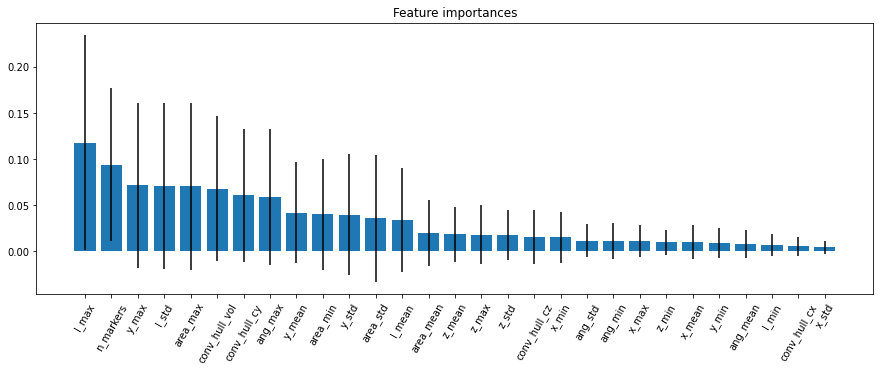

In [7]:
import matplotlib.pyplot as plt

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
feature_indices = np.argsort(importances)[::-1]

# Get feature names from indices
headers = list(df.columns.values)
feature_names = headers[3:]
features_ranked = [feature_names[index] for index in feature_indices]

# Plot importances
plt.figure(figsize=(15,5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[feature_indices], yerr=std[feature_indices])
plt.xticks(range(X_train.shape[1]), features_ranked, rotation=60)
plt.show()

We see that the feature importances have a very high std, indicating that the importance of features varies significantly from tree to tree. Ideally we would not see such a high std (especially in our "most important" features), but the average importance in the forest is telling nonetheless.

We also see that the most important features are from our geometrically-derived set! l_max and l_std, which relate to the distance between each point and the origin; area_max, which corresponds to the greatest triangle area formed by any three points in the instance; two features related to the convex hull.

## Down-select features
The plot of feature importances above indicates which features are most useful for a Random Forest, but we can down-select with more intelligence than picking some number of "best features." Here we'll down-select by choosing an ideal subset of features by evaluating performance with an SGD classifier.

The SGD classifier was chosen for speed during this evaluation, but it's results were very comparable to the same analysis done using SVC and Random Forests. For sake of simplistic documentation in this notebook, only the SGD set is shown. Note that this feature set is _optimal_ for SGD and _not_ as optimal for other classifiers, but the results from this study are comparable and effectivly reduce the dataset's dimensionality.

### Full feature set performance with SGD
Just as the test set was derived on the basis of grouping users, we'll cross-validate using leave-one-group-out.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [9]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import cross_val_score

logo = LeaveOneGroupOut()
n_splits = logo.get_n_splits(X_train_scaled, y_train, user_labels)
print(n_splits, "splits")

cv_splits = logo.split(X_train_scaled, y_train, user_labels)

9 splits


In [10]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=0)
sgd_scores = cross_val_score(sgd, X_train_scaled, y_train, cv=cv_splits, scoring='accuracy')
sgd_scores

array([0.87      , 0.93733333, 0.80133333, 1.        , 0.96466667,
       0.94466667, 0.81533333, 0.79      , 0.97266667])

### Reduce to optimal number of features for SGD classifier

In [11]:
from sklearn.feature_selection import RFECV

sgd = SGDClassifier(random_state=0)
cv_splits = logo.split(X_train_scaled, y_train, user_labels)

rfecv = RFECV(estimator=sgd, step=1, cv=cv_splits, scoring='accuracy')
rfecv.fit(X_train_scaled, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 10


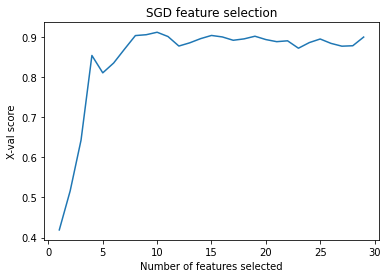

In [12]:
plt.figure()
plt.title('SGD feature selection')
plt.xlabel('Number of features selected')
plt.ylabel('X-val score')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Show SGD-chosen features on original plot of RandomForest-determined most important features.

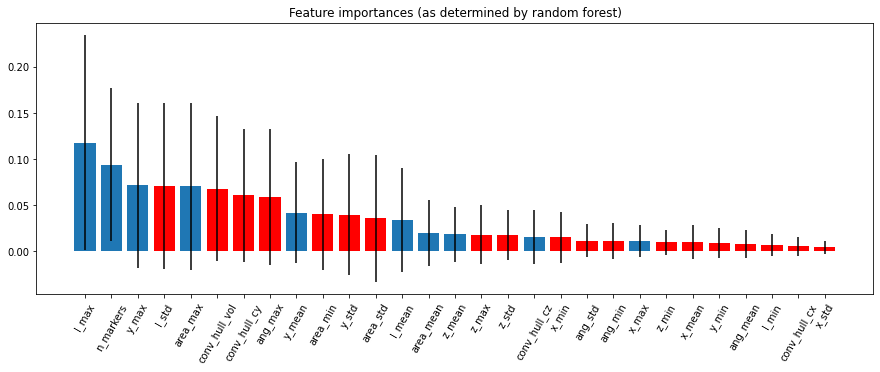

In [13]:
col = np.array(['C0' if x == True else 'r' for x in rfecv.support_])

plt.figure(figsize=(15,5))
plt.title('Feature importances (as determined by random forest)')
plt.bar(range(X_train.shape[1]), importances[feature_indices], yerr=std[feature_indices], color=col[feature_indices])
plt.xticks(range(X_train.shape[1]), features_ranked, rotation=60)
plt.show()

Notice that some features that were highly important in the forest were not chosen here. This could be due to the high std of the importance of these features, i.e. they were very useful in some forests but not in others; this indicates that more consistent features could generalize better to non-forest classifiers, as is clearly the case for the SGD classifier.

### Compare feature sets

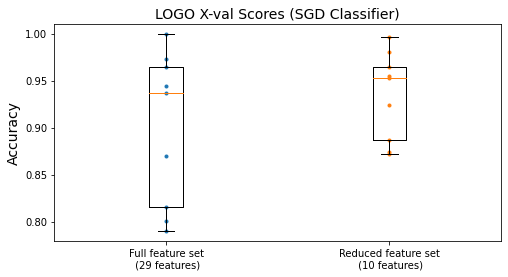

In [14]:
X_train_reduced = X_train_scaled[:, rfecv.support_]

sgd = SGDClassifier(random_state=0)
cv_splits = logo.split(X_train_reduced, y_train, user_labels)
sgd_scores_reduced = cross_val_score(sgd, X_train_reduced, y_train, cv=cv_splits, scoring='accuracy')

plt.figure(figsize=(8, 4))
plt.plot([1]*n_splits, sgd_scores, '.')
plt.plot([2]*n_splits, sgd_scores_reduced, '.')
plt.boxplot([sgd_scores, sgd_scores_reduced],
            labels=('Full feature set' + '\n (' + str(X_train.shape[1]) + ' features)',
                    'Reduced feature set' + '\n (' + str(X_train_reduced.shape[1]) + ' features)'))
plt.title('LOGO X-val Scores (SGD Classifier)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()

The plot above shows the beneficial impact of reducing the number of features in the dataset. With leave-one-group-out (LOGO) cross-validation, we see that the SGD classifier is more consistently accurate with an optimal subset of features. Not only that, but future models will train and evaluate faster now that we have only 1/3 the original number of features.

# Classifier selection
A few classifiers are tried with defaults and then with a little hyperparameter tuning. If even better performance were desired, this tuning could be more extensive. As-is, all of these classifiers perform very well in cross-validation.

From the results shown, SGD, SVC, and random forests all classify the test set very well.

In [15]:
X_original = X_train
X_train = X_train_reduced

df = pd.read_csv('data/train.csv')
X_test_original = df.iloc[:, 3:].values
X_test = scaler.fit_transform(X_test_original)[:, rfecv.support_]
y_test = df['class'].values

## SGD

In [17]:
cv_splits = logo.split(X_train, y_train, user_labels)

sgd = SGDClassifier(random_state=0)
sgd_scores = cross_val_score(sgd, X_train, y_train, cv=cv_splits, scoring='accuracy')
print('x-val accuracy mean', str(np.mean(sgd_scores).round(2)))
print('x-val accuracy std ', str(np.std(sgd_scores).round(2)))

x-val accuracy mean 0.93
x-val accuracy std  0.04


In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'loss': ['hinge', 'log', 'modified_huber'],
               'penalty': ['l2', 'l1', 'elasticnet']}]
cv_splits = logo.split(X_train, y_train, user_labels)

grid_search = GridSearchCV(sgd, param_grid, cv=cv_splits, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 9 folds for each of 9 candidates, totalling 81 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:   21.5s finished


GridSearchCV(cv=<generator object BaseCrossValidator.split at 0x107582e58>,
             estimator=SGDClassifier(random_state=0),
             param_grid=[{'loss': ['hinge', 'log', 'modified_huber'],
                          'penalty': ['l2', 'l1', 'elasticnet']}],
             verbose=1)

In [19]:
grid_search.best_params_

{'loss': 'hinge', 'penalty': 'elasticnet'}

In [20]:
grid_search.best_score_

0.9377037037037037

In [21]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9797037037037037

## Random forests

In [23]:
cv_splits = logo.split(X_train, y_train, user_labels)

rnd = RandomForestClassifier(n_estimators=200, random_state=0)
rnd_scores = cross_val_score(rnd, X_train, y_train, cv=cv_splits, scoring='accuracy')
print('x-val accuracy mean', str(np.mean(rnd_scores).round(2)))
print('x-val accuracy std ', str(np.std(rnd_scores).round(2)))

x-val accuracy mean 0.88
x-val accuracy std  0.13


In [24]:
param_grid = [{'max_depth': [5, 2, None],
               'n_estimators': [200]}]
cv_splits = logo.split(X_train, y_train, user_labels)

grid_search = GridSearchCV(rnd, param_grid, cv=cv_splits, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 9 folds for each of 3 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  1.6min finished


GridSearchCV(cv=<generator object BaseCrossValidator.split at 0x11e4d6a98>,
             estimator=RandomForestClassifier(n_estimators=200, random_state=0),
             param_grid=[{'max_depth': [5, 2, None], 'n_estimators': [200]}],
             verbose=1)

In [25]:
grid_search.best_params_

{'max_depth': None, 'n_estimators': 200}

In [26]:
grid_search.best_score_

0.8763703703703704

In [27]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

## SVC

In [28]:
from sklearn.svm import SVC
cv_splits = logo.split(X_train, y_train, user_labels)

svc = SVC(random_state=0)
svc_scores = cross_val_score(svc, X_train, y_train, cv=cv_splits, scoring='accuracy')
print('x-val accuracy mean', str(np.mean(svc_scores).round(2)))
print('x-val accuracy std ', str(np.std(svc_scores).round(2)))

x-val accuracy mean 0.91
x-val accuracy std  0.08


In [29]:
param_grid = [{'kernel': ['linear', 'rbf']}]
cv_splits = logo.split(X_train, y_train, user_labels)

grid_search = GridSearchCV(svc, param_grid, cv=cv_splits, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 9 folds for each of 2 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    5.4s finished


GridSearchCV(cv=<generator object BaseCrossValidator.split at 0x11bdd5d68>,
             estimator=SVC(random_state=0),
             param_grid=[{'kernel': ['linear', 'rbf']}], verbose=1)

In [30]:
grid_search.best_params_

{'kernel': 'rbf'}

In [31]:
grid_search.best_score_

0.9076296296296297

In [32]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9972592592592593

## Naive bayes
Note that GaussianNB's only hyperparamters are priors and var smoothing. Not hyperparameter tuning this classifier.

In [33]:
from sklearn.naive_bayes import GaussianNB
cv_splits = logo.split(X_train, y_train, user_labels)

gnb = GaussianNB()
gnb_scores = cross_val_score(gnb, X_train, y_train, cv=cv_splits, scoring='accuracy')
print('x-val accuracy mean', str(np.mean(gnb_scores).round(2)))
print('x-val accuracy std ', str(np.std(gnb_scores).round(2)))

x-val accuracy mean 0.85
x-val accuracy std  0.09


In [34]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy_score(y_test, y_pred)

0.9319259259259259